In [2]:
import pandas as pd
import numpy as np
import datetime

data = pd.read_excel('service-data.xlsx')

In [4]:
data.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [5]:
column = "INVOICE LINE TEXT"
prefix = "Parts Name-"

data = pd.get_dummies(data, columns = [column], prefix = prefix)

In [6]:
parts_name_columns = [i for i in data.columns if prefix in i]
parts_sales_agg = {i : 'sum' for i in parts_name_columns}
sales_month = pd.to_datetime(data['Invoice Date']).dt.to_period('M')
#monthly_parts_sales_data = data.g
data.index = sales_month

In [7]:
monthly_parts_sales_data = data.groupby(data.index).agg(parts_sales_agg)

#monthly_parts_sales_data["Parts Name-_ENGINE OIL"]

In [12]:
from statsmodels.tsa.arima_model import ARIMA

X = monthly_parts_sales_data['Parts Name-_YOKE'].values
#print(X)
train = X[0:15] # 27 data as train data
test = X[14:]

#def get_arime() :
model_arima = ARIMA(train,order=(0,0,1))
model_arima_fit = model_arima.fit()
predictions= model_arima_fit.forecast(steps=10)[0]
predictions
    
#df2 = monthly_parts_sales_data.apply(get_arime(), axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
#monthly_parts_sales_data["Parts Name-_YOKE"]

In [10]:
monthly_parts_sales_data["Parts Name-_ENGINE OIL"]

Invoice Date
2017-05      5
2017-06    179
2017-07    172
2017-08    146
2017-09    187
2017-10    158
2017-11    191
2017-12    213
2018-01    154
2018-02    199
2018-03    215
2018-04    207
2018-05    212
2018-06    216
2018-07    208
2018-08    204
2018-09    216
2018-10    241
2018-11    199
2018-12    242
2019-01     38
Freq: M, Name: Parts Name-_ENGINE OIL, dtype: uint8

In [46]:
X = monthly_parts_sales_data['Parts Name-_ENGINE OIL'].values
#print(X)
train = X[0:15] # 27 data as train data
test = X[14:]

#def get_arime() :
model_arima = ARIMA(train,order=(0,0,2))
model_arima_fit = model_arima.fit()
predictions= model_arima_fit.forecast(steps=5)[0]
#predictions

# to check the difference between predicted and actual use below code.

history = [x for x in train]
final_predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    final_predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=198.484023, expected=208.000000
predicted=184.912753, expected=204.000000
predicted=185.187840, expected=216.000000
predicted=184.805711, expected=241.000000
predicted=196.830034, expected=199.000000
predicted=202.504191, expected=242.000000
predicted=187.622732, expected=38.000000


Test MSE: 4073.379


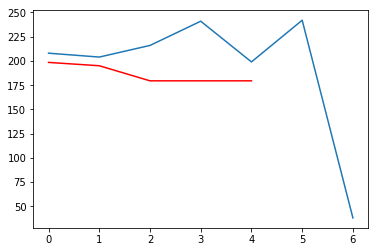

In [40]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test,final_predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()